In [37]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import seaborn as sb

In [38]:
import pandas as pd

In [39]:
all_data = pd.read_excel("C:/Users/sarah/Desktop/W2023 MoCap Data/all_data.xlsx")
all_data.drop(columns=["Observations", "handedness", "max_hand_used"], inplace=True)

In [40]:
m_scaler = MinMaxScaler()
#z_scaler = z_scaler.set_output(transform="pandas")
#z = z_scaler.fit(P1_data)
scaled_features = m_scaler.fit_transform(all_data)

In [41]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10,  max_iter=300)

In [42]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10)

In [43]:
kmeans.inertia_

5.6622368320762

In [44]:
kmeans.cluster_centers_

array([[0.20629384, 0.11869761, 0.71626322, 0.00892484, 0.44151467,
        0.17036872, 0.04849076, 0.10681949, 0.1499479 , 0.24064796,
        0.40466473, 0.08999288, 0.01524302, 0.72523872, 0.94259454,
        0.22156348, 0.29916279, 0.89374932, 0.63327283, 0.04692539,
        0.00610911, 0.34933036, 0.20560748, 0.09404762],
       [0.66149843, 0.26017581, 0.62839852, 0.2040754 , 0.06714074,
        0.28011282, 0.37472851, 0.30531585, 0.54922319, 0.22712325,
        0.04420131, 0.55819231, 0.61952053, 0.91411815, 0.90173764,
        0.51436793, 0.15475969, 0.27562609, 0.66884675, 0.30807295,
        0.03400083, 0.06138393, 0.53738318, 0.42202381],
       [0.53378791, 0.73764979, 0.1189005 , 0.67144369, 0.92366125,
        0.86703223, 0.7017087 , 0.8093495 , 0.91809168, 0.82355591,
        0.8551077 , 0.58603004, 0.82728717, 0.10818594, 0.01630872,
        0.50390097, 0.75231008, 0.04627008, 0.01906576, 0.70789086,
        0.9967498 , 0.99776786, 0.75389408, 0.80892857]])

In [45]:
kmeans.n_iter_

2

In [46]:
#kmeans.labels_[:5]

In [47]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,
                 #"random_state": 42,
                 }

sse = []
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

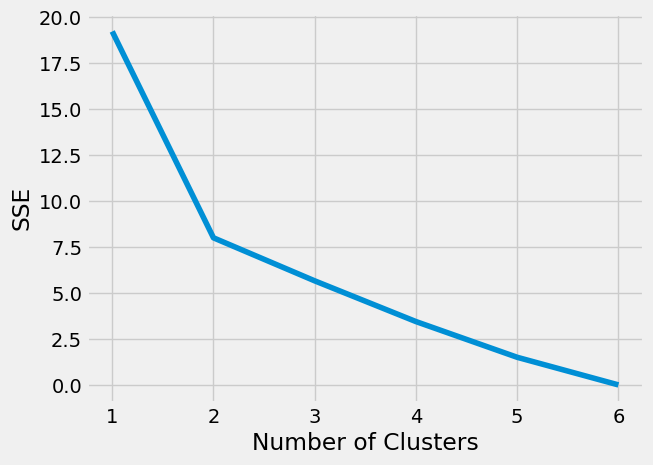

In [48]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 7), sse)
plt.xticks(range(1, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

I could use something like PCA to combine reduce dimensions, but I dont't think that's necessary; sweet spot is cluster of 2

In [49]:
kmeans2 = KMeans(n_clusters = 2)

In [50]:
labels = kmeans2.fit_predict(scaled_features)

In [51]:
filtered_label1 = scaled_features[labels == 1]
filtered_labels0 = scaled_features[labels == 0]

In [52]:
print(labels)

[1 1 0 0 0 0]


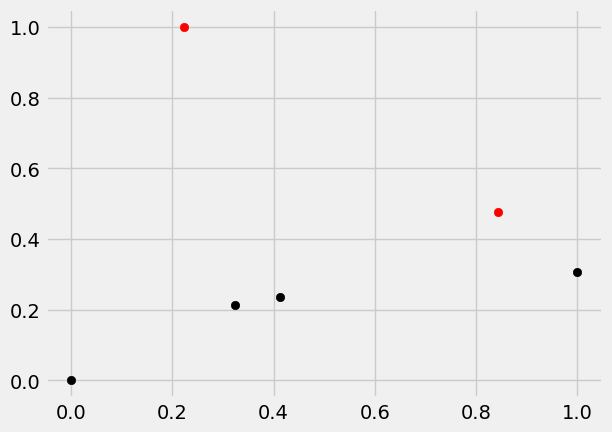

<Figure size 640x480 with 0 Axes>

In [53]:
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'red')
plt.scatter(filtered_labels0[:,0] , filtered_labels0[:,1] , color = 'black')
plt.show()
plt.savefig("Kmeans_clustering")

In [54]:
print(kmeans2.labels_)

[1 1 0 0 0 0]


In [55]:
#label_encoder = LabelEncoder()
#true_label_names = ['P1', 'P2', 'P3','P4','P5','P6' ]
#true_labels = label_encoder.fit_transform(true_label_names)

In [56]:
from sklearn.decomposition import PCA

pca = PCA()
pca_1 = pca.fit(filtered_label1)
pca_1_trans = pca_1.transform(filtered_label1)

pca_2 = pca.fit(filtered_labels0)
pca_2_trans = pca_2.transform(filtered_labels0)

In [57]:
print(pca_1_trans)

[[-1.05246617e+00  1.94289029e-16]
 [ 1.05246617e+00  6.93889390e-17]]


In [58]:
import numpy as np
import heapq

In [59]:
# found the code on stackoverflow! -> https://stackoverflow.com/questions/47370795/pca-on-sklearn-how-to-interpret-pca-components
n_pcs = pca_1.components_.shape[0]

most_important = [np.abs(pca_1.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = ['hands_dist_median', 'hands_dist_max', 'hands_dist_min', 'hands_dist_IQR','vel_head_median', 'vel_lhand_median', 'vel_rhand_median', 
                         'vel_head_max','vel_lhand_max','vel_rhand_max', 'vel_head_iqr','vel_lhand_iqr','vel_rhand_iqr','angle_median_l', 'angle_median_r', 'angle_max_l',
                         'angle_max_r', 'angle_min_l', 'angle_min_r', 'angle_IQR_left', 'angle_IQR_right', 'max_dist_traveled_head', 'max_dist_traveled_left', 
                         'max_dist_traveled_right']

most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

df_1 = pd.DataFrame(dic.items())


In [60]:
df_1

,0,1
0,PC0,angle_min_l
1,PC1,max_dist_traveled_left
2,PC2,vel_head_median
3,PC3,hands_dist_min


In [61]:
three_most_important = [np.abs(pca_1.components_).argsort()]

In [62]:
print(three_most_important)

[array([[ 2, 20, 14,  9, 16, 18, 13,  1, 21,  3,  5,  7,  4, 10, 19,  6,
        23, 15, 22,  8,  0, 11, 12, 17],
       [ 3, 17, 14, 20,  8,  2,  1, 21,  4,  7, 10,  9, 16, 23, 13, 15,
         6, 19,  5,  0, 18, 11, 12, 22],
       [20, 17, 12, 22,  6,  3, 14,  7, 13, 23, 19,  8,  5,  1, 11, 16,
         0, 15,  9, 18, 10,  2, 21,  4],
       [ 7, 20,  9, 14,  5, 19, 11, 13, 10, 21,  3,  8, 15, 16,  6, 12,
         1, 22, 23,  4, 18,  0, 17,  2]], dtype=int64)]


In [63]:
pca_1.components_

array([[-0.31294963, -0.11313476, -0.00865258, -0.12037447,  0.17169287,
        -0.12105282, -0.20362471, -0.15027982, -0.28500318, -0.04809842,
         0.17177603, -0.3367238 , -0.35190934, -0.10027071,  0.03792481,
        -0.22240788,  0.06615263,  0.41153296,  0.07689328, -0.187514  ,
        -0.01919721,  0.11902264, -0.27828649, -0.22023359],
       [ 0.31869697,  0.03020893, -0.02728412,  0.00270773, -0.03362995,
        -0.26151287,  0.20825332, -0.03988294, -0.02647256, -0.06691036,
        -0.04448369, -0.40868495,  0.4247169 ,  0.1124599 , -0.00556773,
         0.17657006,  0.1046312 ,  0.00451741,  0.33160424, -0.23532697,
        -0.00619849, -0.03021187, -0.4408766 ,  0.11061925],
       [ 0.24601068,  0.11971651,  0.34958651, -0.05332886,  0.40671545,
         0.09570799,  0.05131481,  0.07053083,  0.08147875,  0.26897163,
         0.34887629, -0.1269941 , -0.01795482, -0.07121363, -0.06117287,
         0.25527361,  0.23084684,  0.01251994, -0.3402081 , -0.07708142,
  

In [64]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    plt.scatter(xs ,ys) #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

In [75]:
print(pd.DataFrame(pca_1.components_,columns=scaled_features.columns,index = ['PC-1','PC-2']))


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

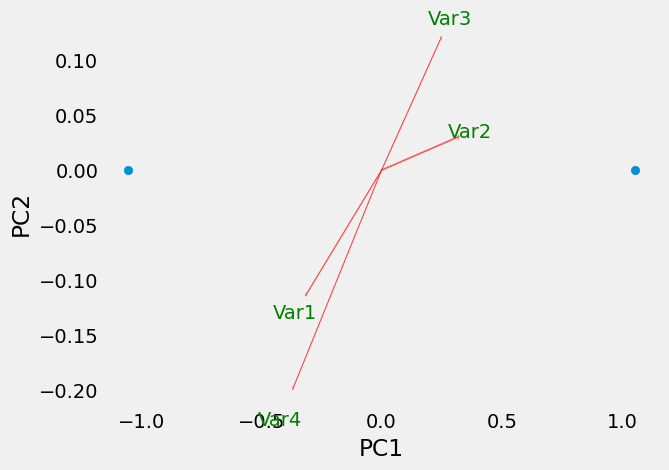

In [65]:
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

myplot(pca_1_trans[:,0:2], pca_1.components_) 
plt.show()


In [66]:
print(pca_1.n_components_, pca_1.explained_variance_ratio_)

4 [4.14870970e-01 3.42168254e-01 2.42960776e-01 7.41576786e-33]


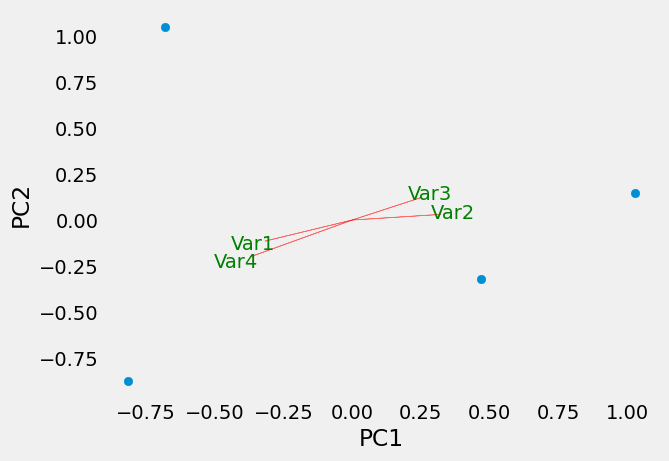

In [67]:
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

myplot(pca_2_trans[:,0:2], pca_2.components_) 
plt.show()


In [68]:
#all_data = pd.read_excel("C:/Users/sarah/Desktop/W2023 MoCap Data/all_data.xlsx")
#all_data = all_data.drop(columns=['Observations'])

In [69]:
#from sklearn.preprocessing import StandardScaler
#z_scaler = StandardScaler()
#z_scaler = z_scaler.set_output(transform="pandas")
#z = z_scaler.fit(P1_data)

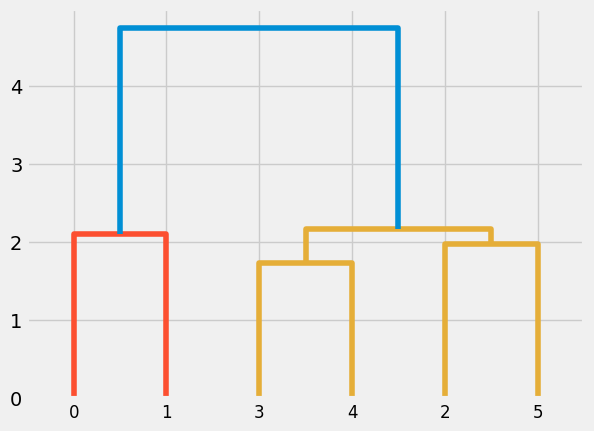

In [70]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(scaled_features, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show() 

In [71]:
from scipy.cluster.hierarchy import fcluster

f1 = fcluster(linkage_data, 2, criterion='maxclust')


In [72]:
print(f1)

[1 1 2 2 2 2]
